In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import re

In [71]:
df = pd.read_csv("primary-experts.csv")

In [72]:
df

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,MoEAutoEncoder-0.activation_dim,MoEAutoEncoder-0.auxk_alpha,...,MoEAutoEncoder-0/l0,MoEAutoEncoder-0/l2_loss,MoEAutoEncoder-0/loss,MoEAutoEncoder-1/auxk_loss,MoEAutoEncoder-1/dead_features,MoEAutoEncoder-1/effective_l0,MoEAutoEncoder-1/frac_variance_explained,MoEAutoEncoder-1/l0,MoEAutoEncoder-1/l2_loss,MoEAutoEncoder-1/loss
0,magic-lake-8,running,-,NaN,NaN,2024-07-12T01:25:20.000Z,11340,NaN,768,0.03125,...,349.797363,1290.345703,1290.345703,0.000000e+00,0,128,0.983422,350.741333,1290.992310,1290.992310
1,floral-gorge-7,running,-,NaN,NaN,2024-07-12T01:24:57.000Z,11370,NaN,768,0.03125,...,230.270874,1694.796875,1694.796875,0.000000e+00,0,64,0.976457,224.876831,1698.265015,1698.265015
2,eager-microwave-6,running,-,NaN,NaN,2024-07-12T01:24:46.000Z,11370,NaN,768,0.03125,...,160.162842,2027.689453,2027.689453,1.430715e-07,1,32,0.973089,150.498169,2034.548584,2034.548584
3,smooth-fire-5,running,-,NaN,NaN,2024-07-12T01:23:28.000Z,11462,NaN,768,0.03125,...,157.597656,2817.041016,2817.041016,7.191233e-05,3412,8,0.959842,132.943726,2821.361328,2821.361328
4,fiery-bird-4,running,-,NaN,NaN,2024-07-12T01:23:24.000Z,11456,NaN,768,0.03125,...,363.588867,1103.176758,1103.176758,0.000000e+00,0,128,0.987553,356.086304,1105.928589,1105.928589
5,sparkling-spaceship-3,running,-,NaN,NaN,2024-07-12T01:21:59.000Z,11551,NaN,768,0.03125,...,248.706055,1446.668579,1446.668579,1.158534e-07,1,64,0.984257,240.511353,1451.920898,1451.920898
6,wobbly-sun-2,running,-,NaN,NaN,2024-07-12T01:21:40.000Z,11564,NaN,768,0.03125,...,177.613281,1773.412598,1773.412598,1.364679e-07,1,32,0.973737,165.370483,1783.320923,1783.320923
7,summer-oath-1,running,-,NaN,NaN,2024-07-12T01:21:27.000Z,11580,NaN,768,0.03125,...,306.933716,2706.503174,2706.503174,7.615345e-05,6834,8,0.957714,225.279663,2722.509277,2722.509277


In [73]:
patterns = ['effective_l0$', 'experts$', 'heaviside$', 'l2_loss$']

In [74]:
filtered_columns = df.columns[df.columns.str.contains('|'.join(patterns))]
df = df[filtered_columns]

In [75]:
df

,MoEAutoEncoder-0.experts,MoEAutoEncoder-0.heaviside,MoEAutoEncoder-1.experts,MoEAutoEncoder-1.heaviside,MoEAutoEncoder-0/effective_l0,MoEAutoEncoder-0/l2_loss,MoEAutoEncoder-1/effective_l0,MoEAutoEncoder-1/l2_loss
0,32,False,32,True,128,1290.345703,128,1290.992310
1,32,False,32,True,64,1694.796875,64,1698.265015
2,32,False,32,True,32,2027.689453,32,2034.548584
3,32,False,32,True,8,2817.041016,8,2821.361328
4,16,False,16,True,128,1103.176758,128,1105.928589
5,16,False,16,True,64,1446.668579,64,1451.920898
6,16,False,16,True,32,1773.412598,32,1783.320923
7,16,False,16,True,8,2706.503174,8,2722.509277


In [77]:
df.columns = [re.split(r'[./]', col)[-1] for col in df.columns]

In [78]:
df

,experts,heaviside,experts,heaviside,effective_l0,l2_loss,effective_l0,l2_loss
0,32,False,32,True,128,1290.345703,128,1290.992310
1,32,False,32,True,64,1694.796875,64,1698.265015
2,32,False,32,True,32,2027.689453,32,2034.548584
3,32,False,32,True,8,2817.041016,8,2821.361328
4,16,False,16,True,128,1103.176758,128,1105.928589
5,16,False,16,True,64,1446.668579,64,1451.920898
6,16,False,16,True,32,1773.412598,32,1783.320923
7,16,False,16,True,8,2706.503174,8,2722.509277


In [80]:
l0 = df["effective_l0"].to_numpy().flatten()
mse_loss = df["l2_loss"].to_numpy().flatten()
experts = df["experts"].to_numpy().flatten()
heaviside = df["heaviside"].to_numpy().flatten()

In [81]:
data = np.array([experts, heaviside, l0, mse_loss]).T
df = pd.DataFrame(data, columns=['experts', 'heaviside', 'l0', 'mse_loss'])
df = df.sort_values(by='l0')

In [82]:
df

,experts,heaviside,l0,mse_loss
6,32.0,0.0,8.0,2817.041016
7,32.0,1.0,8.0,2821.361328
14,16.0,0.0,8.0,2706.503174
15,16.0,1.0,8.0,2722.509277
4,32.0,0.0,32.0,2027.689453
5,32.0,1.0,32.0,2034.548584
12,16.0,0.0,32.0,1773.412598
13,16.0,1.0,32.0,1783.320923
2,32.0,0.0,64.0,1694.796875
3,32.0,1.0,64.0,1698.265015


In [85]:
df16s = df[(df['experts'] == 16) & (df['heaviside'] == 0)]
df16h = df[(df['experts'] == 16) & (df['heaviside'] == 1)]

df32s = df[(df['experts'] == 32) & (df['heaviside'] == 0)]
df32h = df[(df['experts'] == 32) & (df['heaviside'] == 1)]

In [91]:
df16s.to_csv("experts16s.csv")
df16h.to_csv("experts16h.csv")
df32s.to_csv("experts32s.csv")
df32h.to_csv("experts32h.csv")

## Plotting

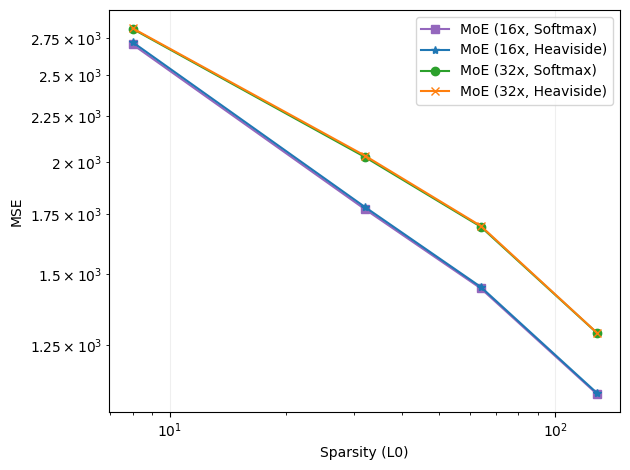

In [90]:
plt.plot(df16s['l0'], df16s['mse_loss'], label='MoE (16x, Softmax)', marker='s', color='#9467bd')
plt.plot(df16h['l0'], df16h['mse_loss'], label='MoE (16x, Heaviside)', marker='*', color='#1f77b4')
plt.plot(df32s['l0'], df32s['mse_loss'], label='MoE (32x, Softmax)', marker='o', color='#2ca02c')
plt.plot(df32h['l0'], df32h['mse_loss'], label='MoE (32x, Heaviside)', marker='x', color='#ff7f0e')


plt.xscale('log')
plt.yscale('log')

plt.xlabel("Sparsity (L0)")
plt.ylabel("MSE")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("experts_l0_mse.png")
plt.show()